In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from torchvision import models
from netlens.modules import FlatModel
from netlens.data import *
from netlens.image_proc import *
from netlens.generate import NetDreamer

In [2]:
IMAGE_PATH = '../../images/examples/'

### CNN Layer Visualization

In [3]:
original_model = models.vgg16(pretrained=True)

In [4]:
nd = NetDreamer(original_model)

In [5]:
recreated_img, processed_img = nd.generate_filter_visualization('features-conv-7', 5)

Iteration: 1, Loss: 1.2282
Iteration: 2, Loss: -2.0634
Iteration: 3, Loss: -8.6437
Iteration: 4, Loss: -15.8244
Iteration: 5, Loss: -22.8342
Iteration: 6, Loss: -29.2272
Iteration: 7, Loss: -35.2442
Iteration: 8, Loss: -41.0586
Iteration: 9, Loss: -46.7112
Iteration: 10, Loss: -52.2626
Iteration: 11, Loss: -57.6477
Iteration: 12, Loss: -62.9135
Iteration: 13, Loss: -68.1027
Iteration: 14, Loss: -73.2309
Iteration: 15, Loss: -78.3074
Iteration: 16, Loss: -83.3505
Iteration: 17, Loss: -88.3622
Iteration: 18, Loss: -93.3412
Iteration: 19, Loss: -98.2935
Iteration: 20, Loss: -103.2408
Iteration: 21, Loss: -108.2359
Iteration: 22, Loss: -113.2330
Iteration: 23, Loss: -118.2298
Iteration: 24, Loss: -123.2265
Iteration: 25, Loss: -128.2431
Iteration: 26, Loss: -133.2721
Iteration: 27, Loss: -138.3083
Iteration: 28, Loss: -143.3555
Iteration: 29, Loss: -148.4279
Iteration: 30, Loss: -153.5312


In [6]:
processed_img.shape

torch.Size([1, 3, 224, 224])

In [7]:
type(recreated_img)

numpy.ndarray

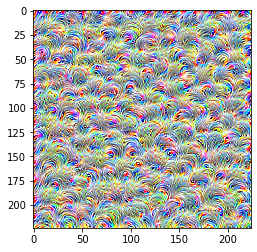

In [8]:
plt.imshow(recreated_img)

### Generate class example

In [9]:
target_class = 130  # Flamingo
pretrained_model = models.alexnet(pretrained=True)
nd = NetDreamer(pretrained_model)
rec_img, proc_img = nd.generate_class_sample(target_class)

Iteration: 1, Loss: -0.8716
Iteration: 2, Loss: -2.3410
Iteration: 3, Loss: -4.2646
Iteration: 4, Loss: -6.4955
Iteration: 5, Loss: -8.7614
Iteration: 6, Loss: -11.5613
Iteration: 7, Loss: -15.3075
Iteration: 8, Loss: -21.0838
Iteration: 9, Loss: -27.8995
Iteration: 10, Loss: -35.9719
Iteration: 11, Loss: -47.8934
Iteration: 12, Loss: -62.4388
Iteration: 13, Loss: -81.7324
Iteration: 14, Loss: -106.7854
Iteration: 15, Loss: -137.9032
Iteration: 16, Loss: -173.3557
Iteration: 17, Loss: -217.7869
Iteration: 18, Loss: -270.0542
Iteration: 19, Loss: -334.4927
Iteration: 20, Loss: -409.3558
Iteration: 21, Loss: -491.9169
Iteration: 22, Loss: -593.6206
Iteration: 23, Loss: -709.0351
Iteration: 24, Loss: -838.3484
Iteration: 25, Loss: -987.5959
Iteration: 26, Loss: -1155.4822
Iteration: 27, Loss: -1348.5339
Iteration: 28, Loss: -1562.7864
Iteration: 29, Loss: -1801.8649
Iteration: 30, Loss: -2066.2935
Iteration: 31, Loss: -2354.8052
Iteration: 32, Loss: -2672.2219
Iteration: 33, Loss: -3019.5

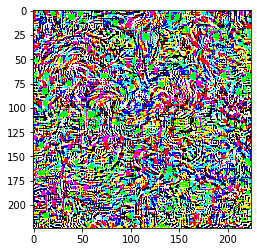

In [10]:
plt.imshow(rec_img)

### Deep Dream

In [11]:
pretrained_model = models.vgg19(pretrained=True).features
nd = NetDreamer(pretrained_model)

In [ ]:
cnn_layer = 'conv-15'
filter_pos = 94

img = PIL.Image.open(IMAGE_PATH + 'panda.jpg').convert('RGB')

# Fully connected layer is not needed
pretrained_model = models.vgg19(pretrained=True).features
nd = NetDreamer(pretrained_model)
dd, _ = nd.deep_dream(img, cnn_layer, filter_pos, 300)

plt.imshow(dd) 

Iteration: 1, Loss: 4.9753
Iteration: 2, Loss: 0.8458
Iteration: 3, Loss: -2.1049
Iteration: 4, Loss: -4.8179
Iteration: 5, Loss: -6.6058
Iteration: 6, Loss: -9.6869
Iteration: 7, Loss: -13.1330
Iteration: 8, Loss: -16.2638
Iteration: 9, Loss: -20.4187
Iteration: 10, Loss: -24.3391
Iteration: 11, Loss: -28.0675
Iteration: 12, Loss: -32.5452
Iteration: 13, Loss: -36.8842
Iteration: 14, Loss: -40.8191
Iteration: 15, Loss: -45.9824
Iteration: 16, Loss: -50.1657
Iteration: 17, Loss: -55.5625
Iteration: 18, Loss: -60.0845
Iteration: 19, Loss: -64.3543
Iteration: 20, Loss: -67.8997
Iteration: 21, Loss: -73.1012
Iteration: 22, Loss: -76.0913
Iteration: 23, Loss: -80.5368
Iteration: 24, Loss: -85.8903
Iteration: 25, Loss: -90.9796
Iteration: 26, Loss: -94.7712
Iteration: 27, Loss: -97.9901
Iteration: 28, Loss: -102.2576
Iteration: 29, Loss: -106.0986
Iteration: 30, Loss: -110.5003
Iteration: 31, Loss: -114.2868
Iteration: 32, Loss: -117.8682
Iteration: 33, Loss: -121.8699
Iteration: 34, Loss: 

In [ ]:
dd.shape

In [ ]:
plt.figure(figsize=(15,12))
plt.imshow(dd)

## Generate inverted image

Generate an Image that maximizes some Layers activations

In [ ]:
original_img, name, target_class = get_example_data(2, img_path=IMAGE_PATH)

In [ ]:
original_img.size

In [ ]:
plt.imshow(original_img)

In [ ]:
original_model = models.alexnet(pretrained=True)

In [ ]:
nd = NetDreamer(original_model)

In [ ]:
nd.original_model

In [ ]:
ii, _ = nd.generate_inverted_image(original_img, 'features-conv-1')

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ii)